In [138]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
# %matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (24,8)

import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('../data/course_project_train.csv')
dftst = pd.read_csv('../data/course_project_test.csv')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [141]:
for c in df.columns:
    n_vals = df[c].unique().size
    print(f"{c:<30}   {str(df[c].dtype):<10}  {n_vals:<5} {'to_cat_candidate' if n_vals<20 else 'number'}")

Home Ownership                   object      4     to_cat_candidate
Annual Income                    float64     5479  number
Years in current job             object      12    to_cat_candidate
Tax Liens                        float64     8     to_cat_candidate
Number of Open Accounts          float64     39    number
Years of Credit History          float64     408   number
Maximum Open Credit              float64     6963  number
Number of Credit Problems        float64     8     to_cat_candidate
Months since last delinquent     float64     90    number
Bankruptcies                     float64     6     to_cat_candidate
Purpose                          object      15    to_cat_candidate
Term                             object      2     to_cat_candidate
Current Loan Amount              float64     5386  number
Current Credit Balance           float64     6592  number
Monthly Debt                     float64     6716  number
Credit Score                     float64     269   number
Cr

In [142]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [143]:
'''                                                                    
Home Ownership                   object      4     to_cat_candidate    cat
Annual Income                    float64     5479  number              number-------------5943 non-null
Years in current job             object      12    to_cat_candidate    try факторизацию---7129 non-null
Tax Liens                        float64     8     to_cat_candidate    number
Number of Open Accounts          float64     39    number              number
Years of Credit History          float64     408   number              number
Maximum Open Credit              float64     6963  number              number
Number of Credit Problems        float64     8     to_cat_candidate    number
Months since last delinquent     float64     90    number              number-------------3419 non-null
Bankruptcies                     float64     6     to_cat_candidate    number-------------7486 non-null    
Purpose                          object      15    to_cat_candidate    cat    
Term                             object      2     to_cat_candidate    bin
Current Loan Amount              float64     5386  number              number
Current Credit Balance           float64     6592  number              number
Monthly Debt                     float64     6716  number              number
Credit Score                     float64     269   number              number------------5943 non-null
Credit Default                   int64       2                ******
'''
print()

In [144]:
df['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [145]:
(df['Annual Income'].isnull() & df['Credit Score'].isnull()).astype('int').sum()


1557

In [146]:
# df['Credit Score_0'] = df['Credit Score'].fillna(0) не будем
#BASE_FEATURE_NAMES.remove('Credit Score_0')

In [147]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

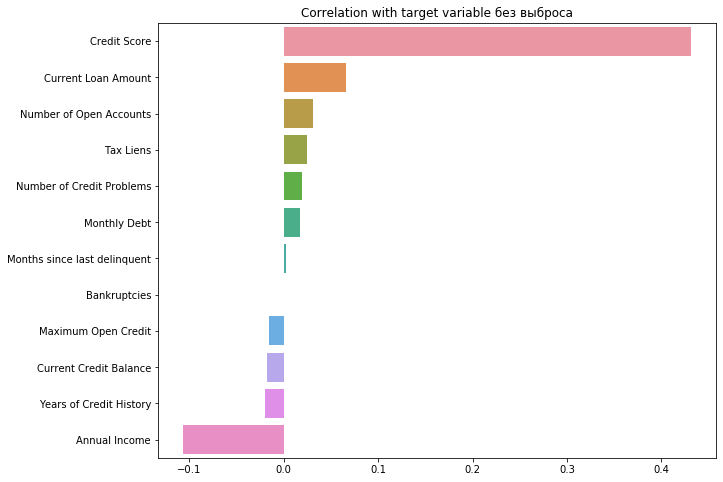

In [148]:
corr_with_target = \
df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable без выброса')
plt.show()

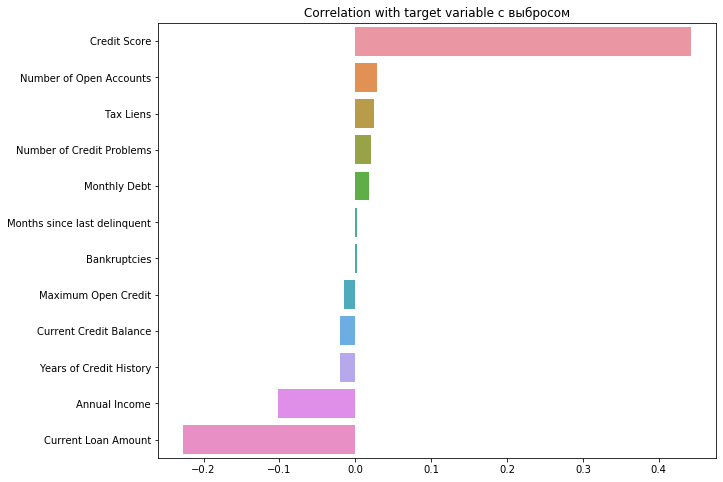

In [149]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable с выбросом')
plt.show()

## Распределения числовых переменных

### 'Annual Income'

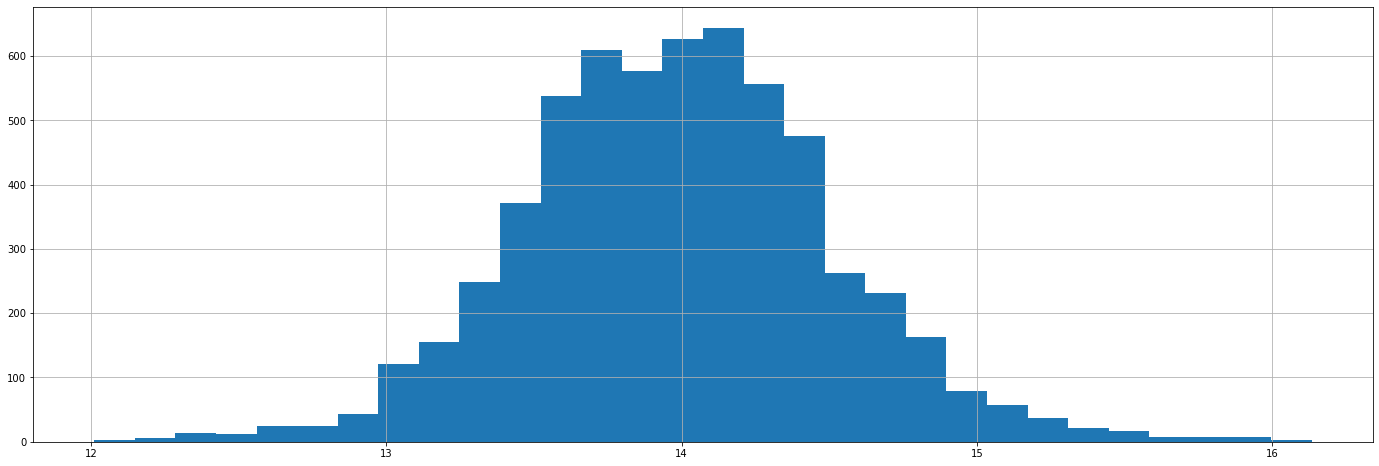

In [150]:
df['Annual Income'].apply(np.log).hist(bins=30)
plt.show()

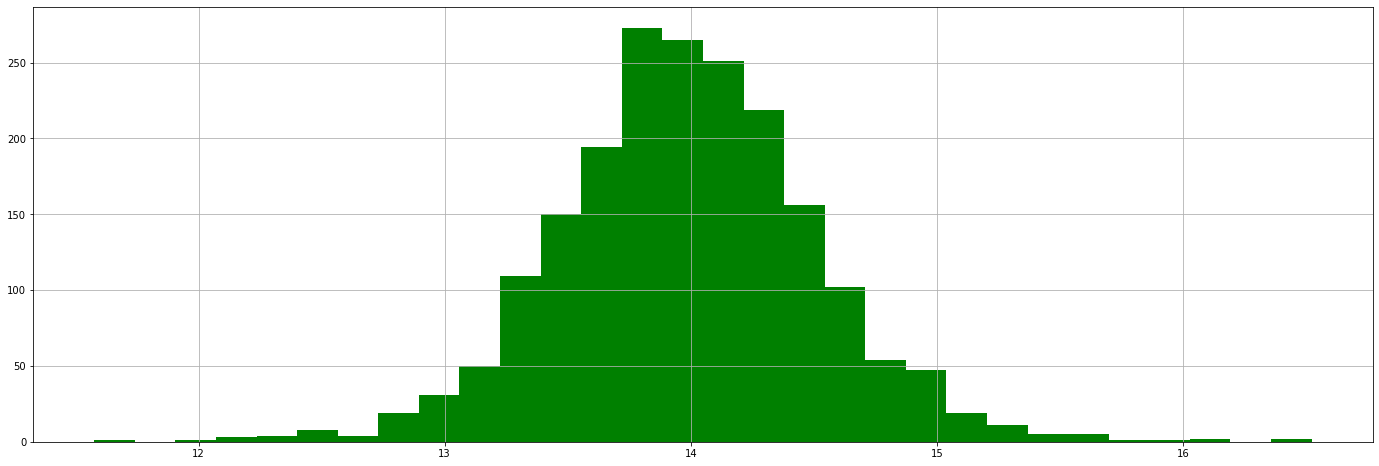

In [151]:
dftst['Annual Income'].apply(np.log).hist(bins=30, color='green')
plt.show()

In [152]:
df['log Annual Income'] = df['Annual Income'].apply(np.log)
dftst['log Annual Income'] = dftst['Annual Income'].apply(np.log)
BASE_FEATURE_NAMES.append('log Annual Income')
BASE_FEATURE_NAMES.remove('Annual Income')

### 'Number of Open Accounts'

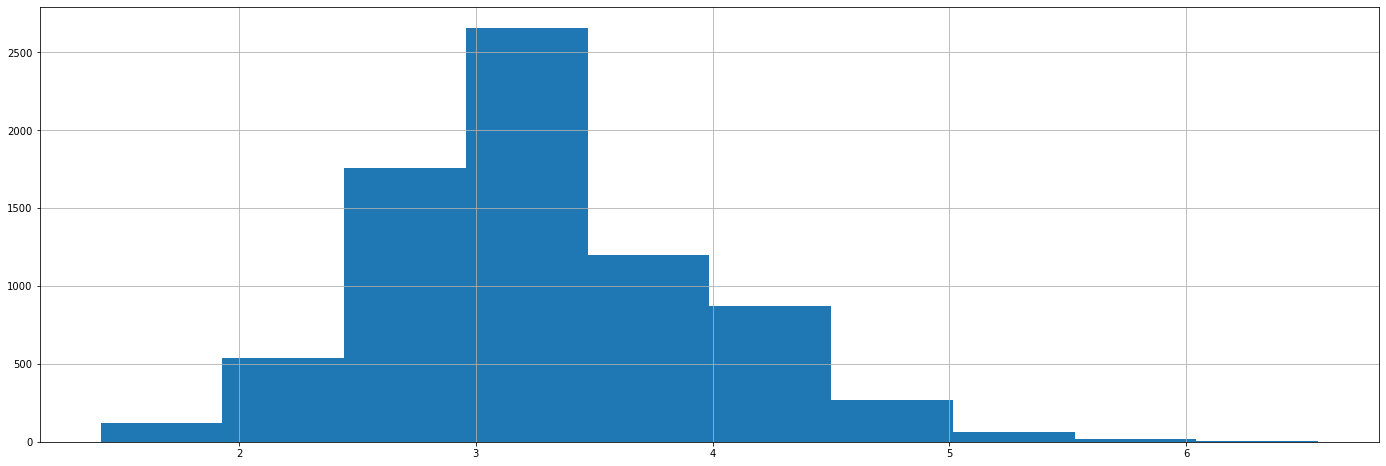

In [153]:
df['Number of Open Accounts'].apply(np.sqrt).hist()
plt.show()

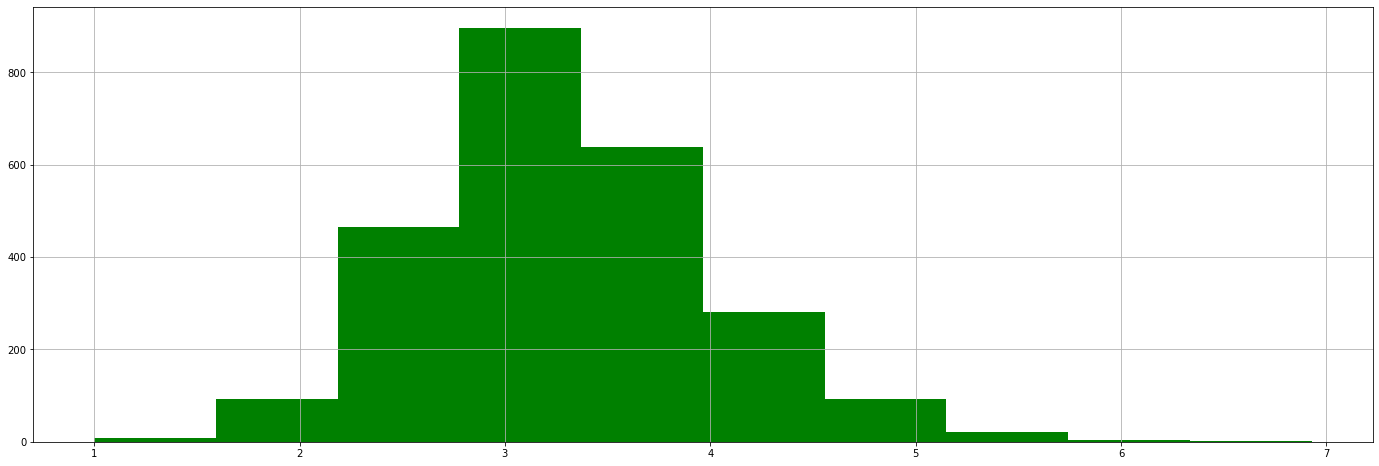

In [154]:
dftst['Number of Open Accounts'].apply(np.sqrt).hist(color='green')
plt.show()

In [155]:
df['sqr Number of Open Accounts'] = df['Number of Open Accounts'].apply(np.sqrt)
dftst['sqr Number of Open Accounts'] = dftst['Number of Open Accounts'].apply(np.sqrt)
BASE_FEATURE_NAMES.append('sqr Number of Open Accounts')
BASE_FEATURE_NAMES.remove('Number of Open Accounts')

### 'Years of Credit History'

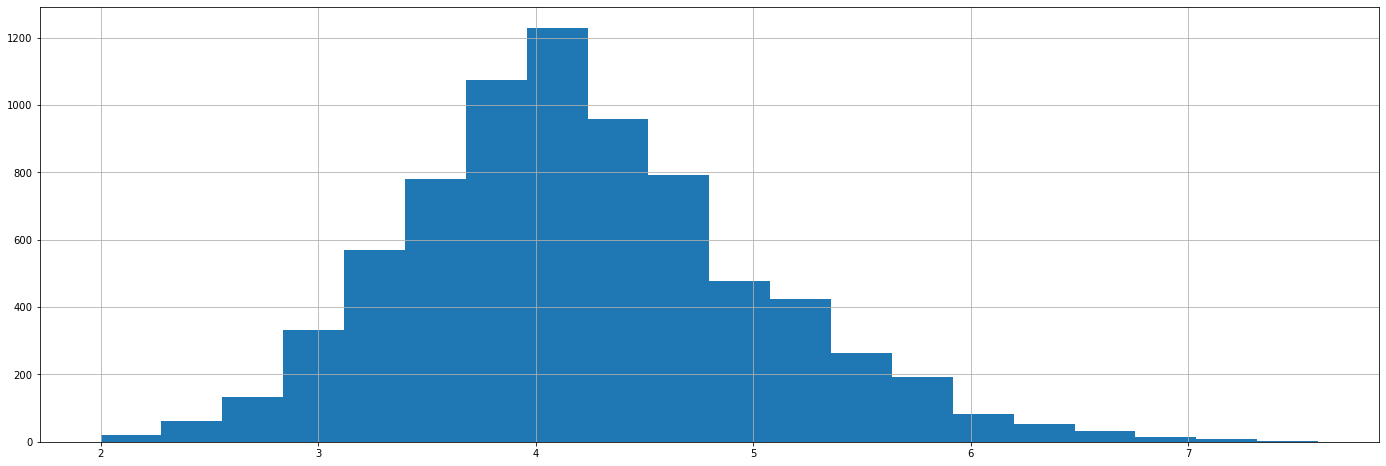

In [156]:
df['Years of Credit History'].apply(np.sqrt).hist(bins=20)
plt.show()

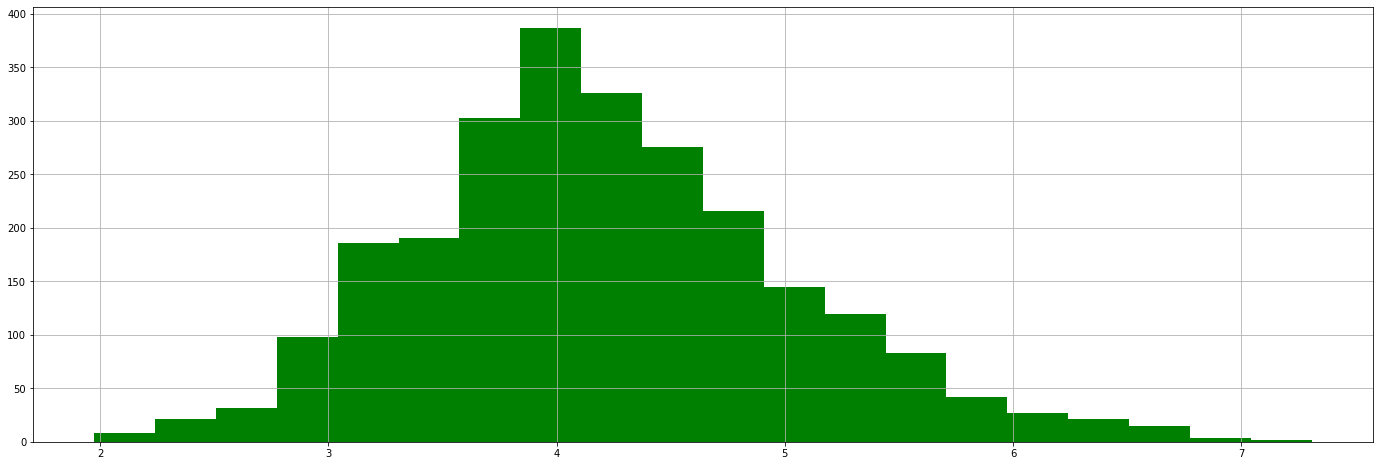

In [157]:
dftst['Years of Credit History'].apply(np.sqrt).hist(bins=20, color='green')
plt.show()

In [158]:
df['sqr Years of Credit History'] = df['Years of Credit History'].apply(np.sqrt)
dftst['sqr Years of Credit History'] = dftst['Years of Credit History'].apply(np.sqrt)
BASE_FEATURE_NAMES.append('sqr Years of Credit History')
BASE_FEATURE_NAMES.remove('Years of Credit History')

### 'Maximum Open Credit'

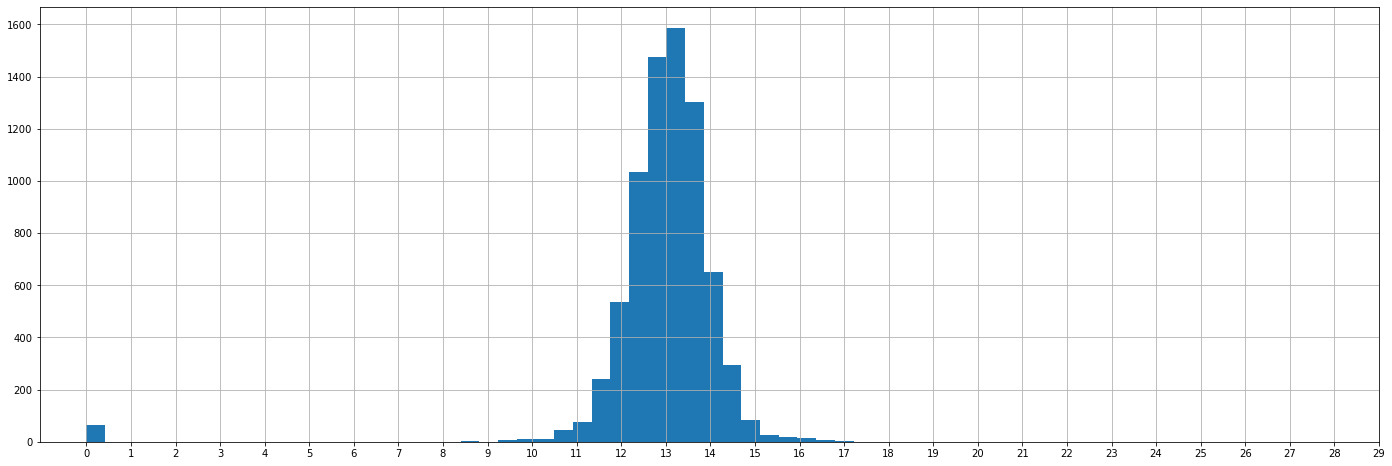

In [159]:
pl = (df['Maximum Open Credit']+1).apply(np.log).hist(bins=50)
pl.set_xticks(range(30))
plt.show()

In [160]:
# выбросами являются значения 0 и >10M
df.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'].shape,\
df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'].shape

((65,), (27,))

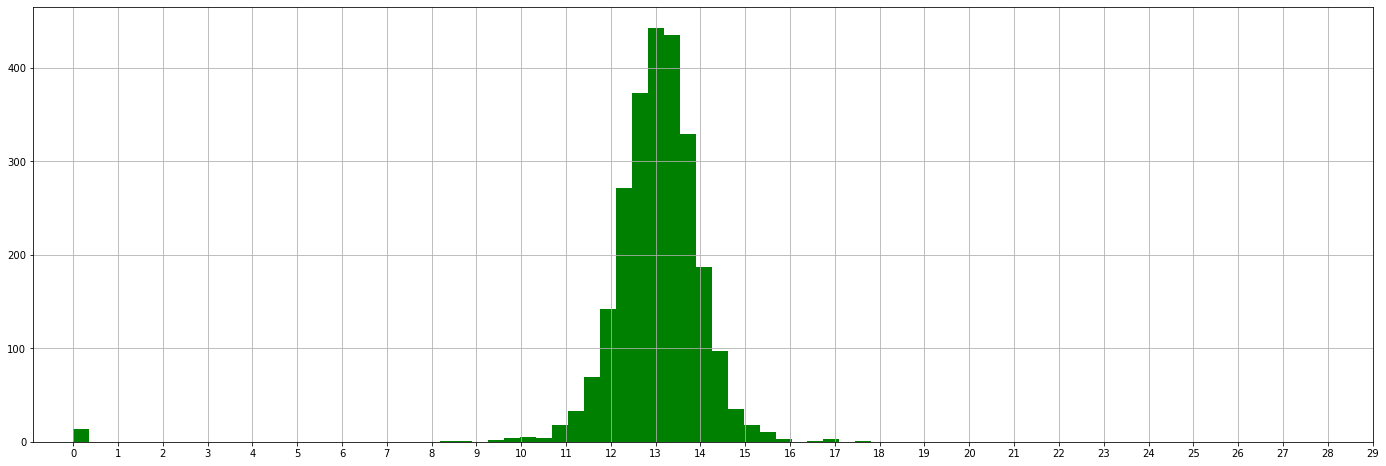

In [161]:
pl = (dftst['Maximum Open Credit']+1).apply(np.log).hist(bins=50,color='green')
pl.set_xticks(range(30))
plt.show()

In [162]:
dftst.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'].shape,\
dftst.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'].shape

((29,), (11,))

In [163]:
med = df['Maximum Open Credit'].median()

In [164]:
df['Maximum Open Credit'].median(), dftst['Maximum Open Credit'].median()

(478159.0, 478676.0)

In [165]:
# заменим верхний выброс медианой

df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'] = med
dftst.loc[dftst['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'] = med

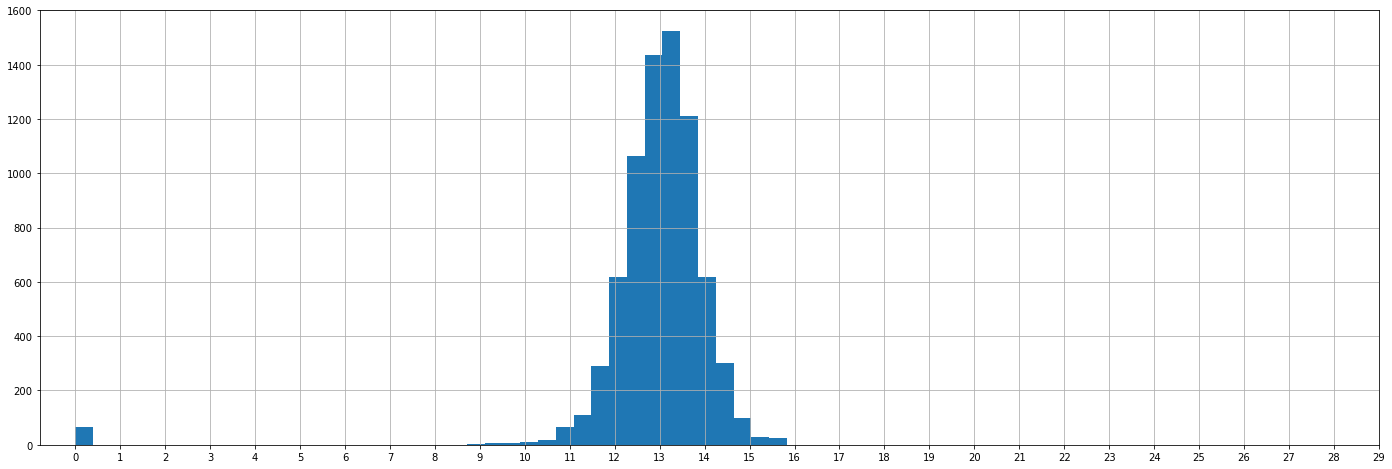

In [166]:
pl = (df['Maximum Open Credit']+1).apply(np.log).hist(bins=40)
pl.set_xticks(range(30))
plt.show()

In [167]:
df.loc[df['Maximum Open Credit']==0, TARGET_NAME].mean(), df.loc[df['Maximum Open Credit']!=0, TARGET_NAME].mean()

(0.15384615384615385, 0.28285137861466036)

In [168]:
# Нижний выброс оказывает существенное влияние на целевую переменную, введем дополнительную переменную, а 0 заменим на null
df['bin nomore Open Credit'] = np.where(df['Maximum Open Credit']==0, 1, 0)
dftst['bin nomore Open Credit'] = np.where(dftst['Maximum Open Credit']==0, 1, 0)

df['Maximum Open Credit'] = np.where(df['Maximum Open Credit']==0, np.nan, df['Maximum Open Credit'])
dftst['Maximum Open Credit'] = np.where(dftst['Maximum Open Credit']==0, np.nan, dftst['Maximum Open Credit'])

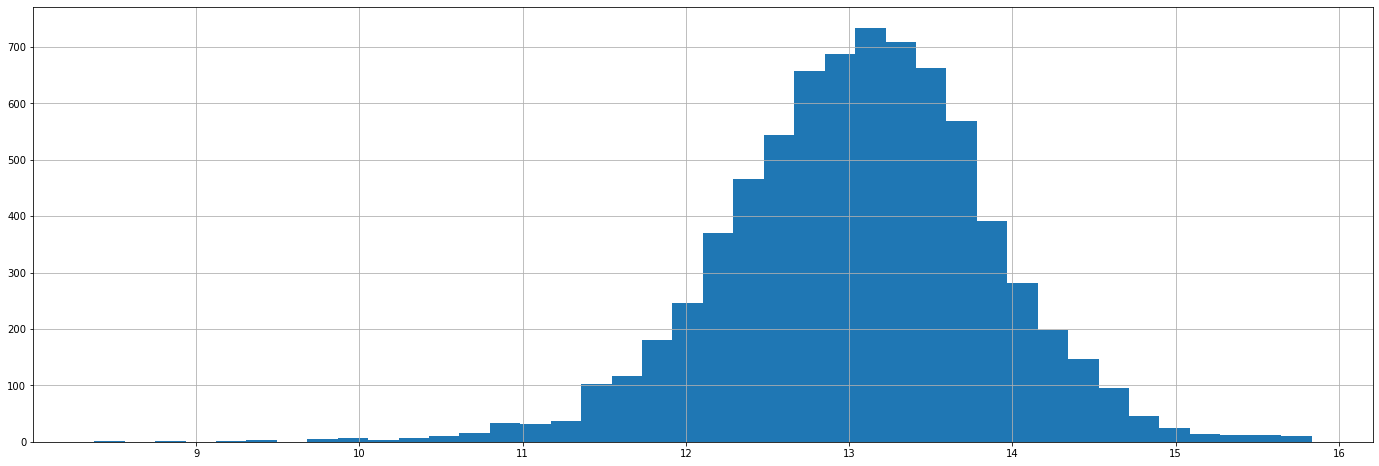

In [169]:
pl = (df['Maximum Open Credit']+1).apply(np.log).hist(bins=40)
#pl.set_xticks(range(30))
plt.show()

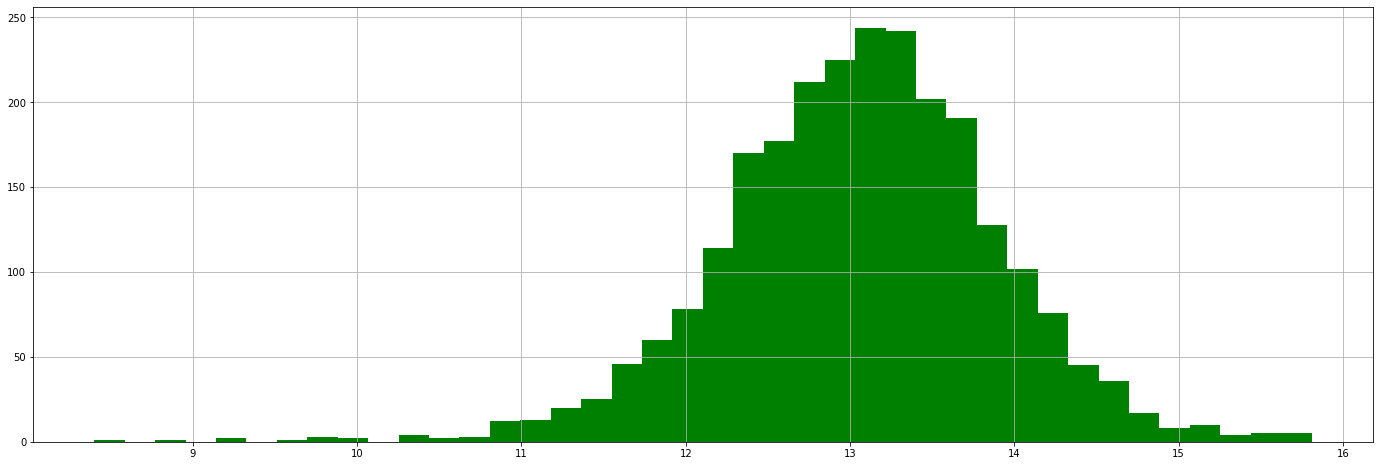

In [170]:
pl = (dftst['Maximum Open Credit']+1).apply(np.log).hist(bins=40, color='green')
#pl.set_xticks(range(30))
plt.show()

In [171]:
BASE_FEATURE_NAMES.append('bin nomore Open Credit')
df['log Maximum Open Credit'] = df['Maximum Open Credit'].apply(np.log)
dftst['log Maximum Open Credit'] = dftst['Maximum Open Credit'].apply(np.log)
BASE_FEATURE_NAMES.append('log Maximum Open Credit')
BASE_FEATURE_NAMES.remove('Maximum Open Credit')

### 'Current Loan Amount'

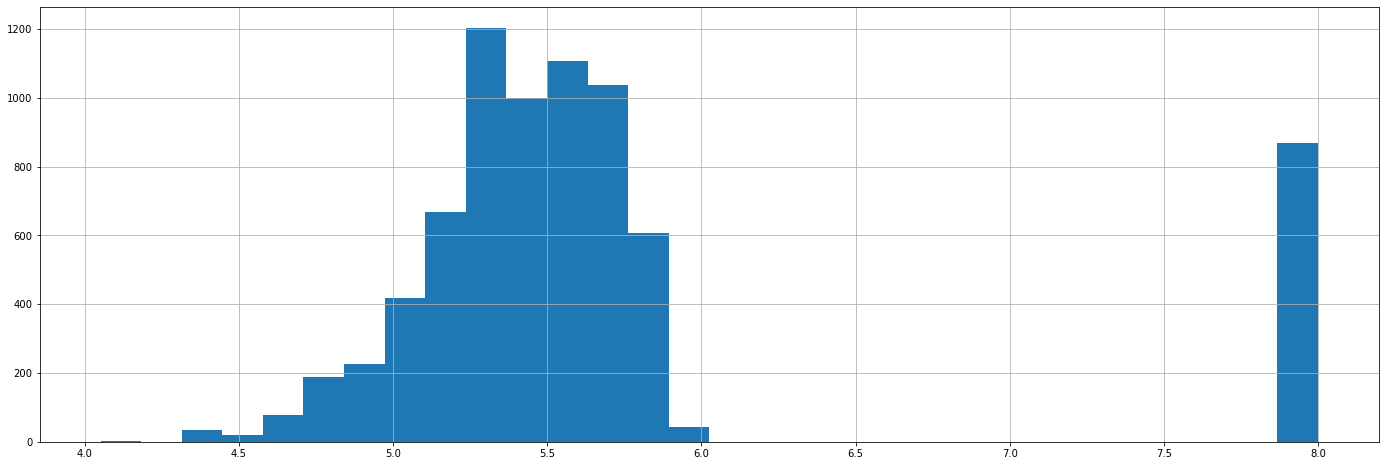

In [172]:
df['Current Loan Amount'].apply(np.log10).hist(bins=30)

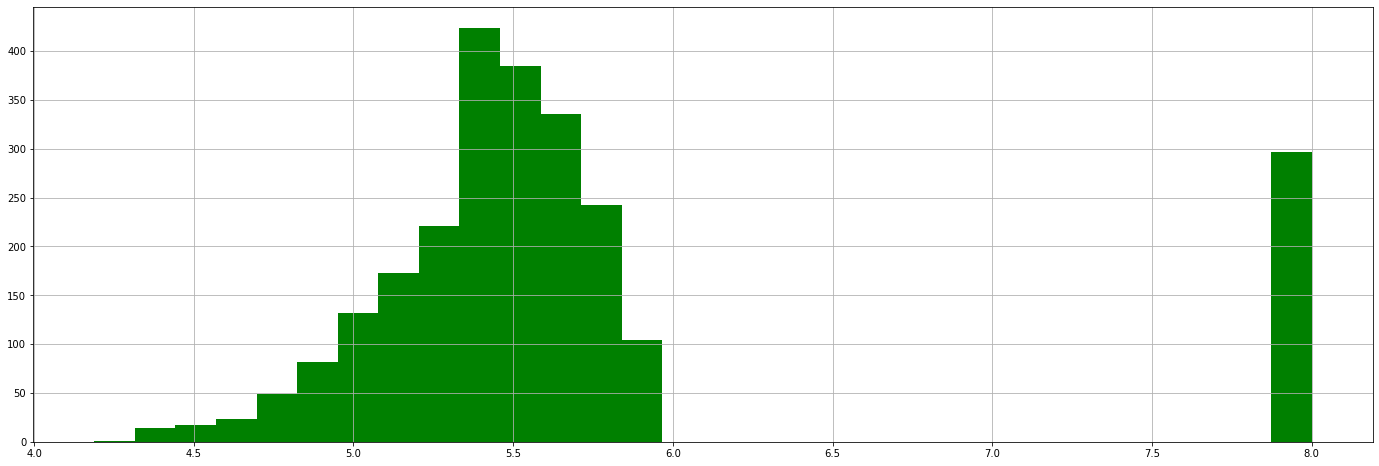

In [173]:
dftst['Current Loan Amount'].apply(np.log10).hist(bins=30, color='green')

In [174]:
df['bin isflyer Current Loan Amount'] = np.where(df['Current Loan Amount']>=10**7, 1, 0)
dftst['bin isflyer Current Loan Amount'] = np.where(dftst['Current Loan Amount']>=10**7, 1, 0)

df['Current Loan Amount'] = np.where(df['Current Loan Amount']>=10**7, np.nan, df['Current Loan Amount'])
dftst['Current Loan Amount'] = np.where(dftst['Current Loan Amount']>=10**7, np.nan, dftst['Current Loan Amount'])

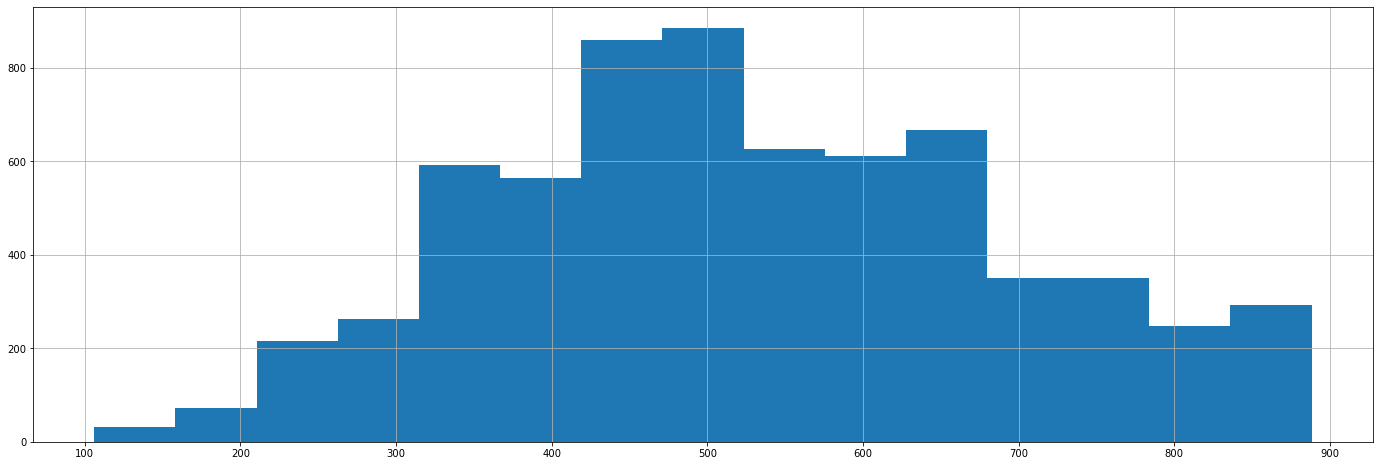

In [175]:
df['Current Loan Amount'].apply(np.sqrt).hist(bins=15)

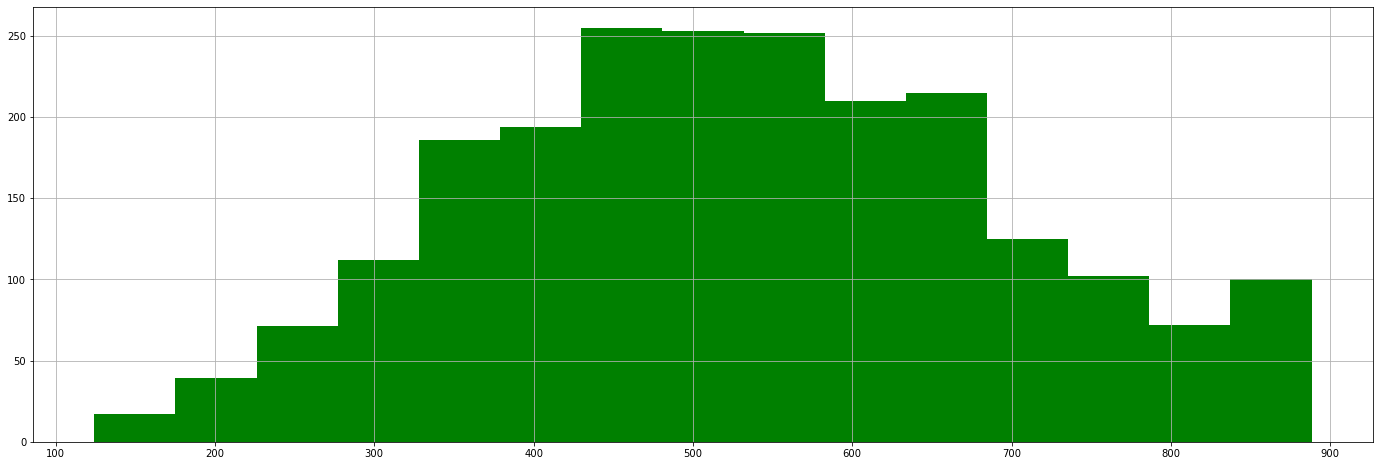

In [176]:
dftst['Current Loan Amount'].apply(np.sqrt).hist(bins=15, color='green')

In [177]:
BASE_FEATURE_NAMES.append('bin isflyer Current Loan Amount')
df['sqr Current Loan Amount'] = df['Current Loan Amount'].apply(np.sqrt)
dftst['sqr Current Loan Amount'] = dftst['Current Loan Amount'].apply(np.sqrt)
BASE_FEATURE_NAMES.append('sqr Current Loan Amount')
BASE_FEATURE_NAMES.remove('Current Loan Amount')

### 'Current Credit Balance'

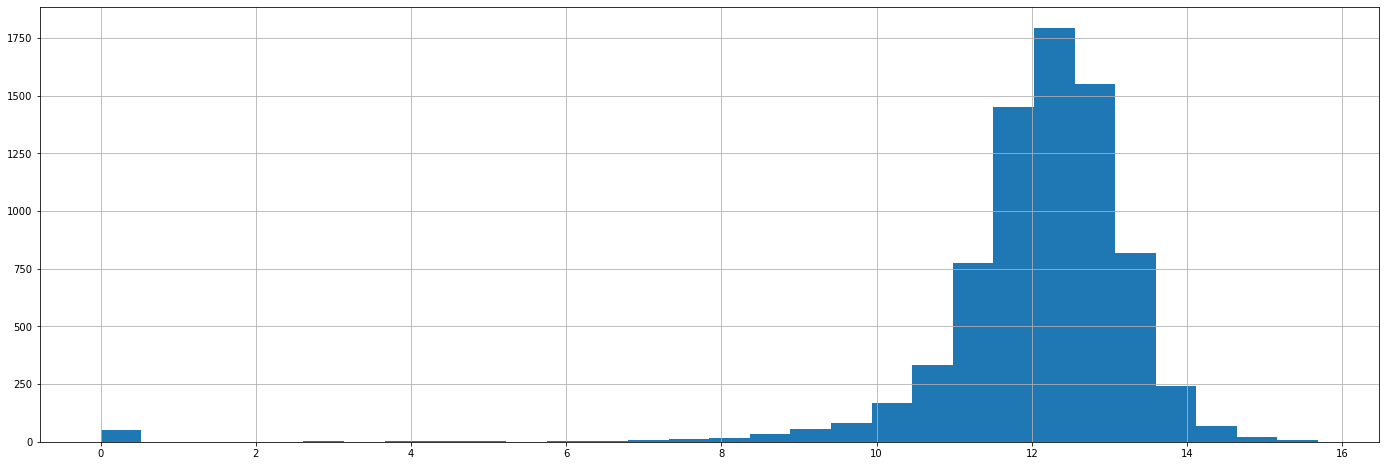

In [178]:
(df['Current Credit Balance'] + 1).apply(np.log).hist(bins=30)
plt.show()

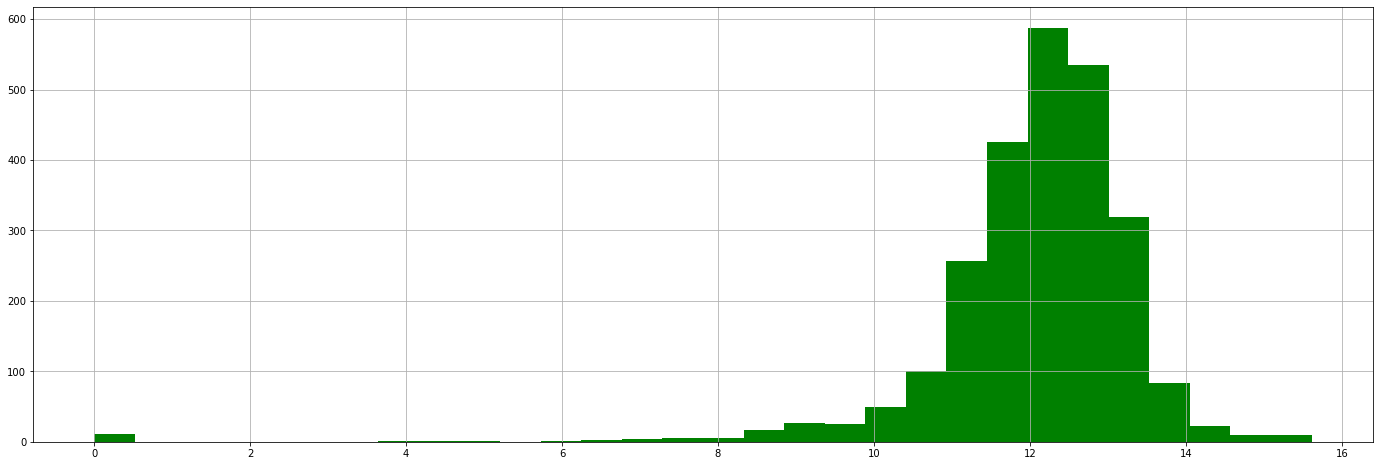

In [179]:
(dftst['Current Credit Balance'] + 1).apply(np.log).hist(bins=30, color='green')
plt.show()

In [180]:
df.loc[df['Current Credit Balance']==0, TARGET_NAME].mean(), df.loc[df['Current Credit Balance']!=0, TARGET_NAME].mean()

(0.16981132075471697, 0.2825298778031422)

In [181]:
# Нижний выброс оказывает существенное влияние на целевую переменную, введем дополнительную переменную, а 0 заменим на null
df['bin no Current Credit Balance'] = np.where(df['Current Credit Balance']==0, 1, 0)
dftst['bin no Current Credit Balance'] = np.where(dftst['Current Credit Balance']==0, 1, 0)

df['Current Credit Balance'] = np.where(df['Current Credit Balance']==0, np.nan, df['Current Credit Balance'])
dftst['Current Credit Balance'] = np.where(dftst['Current Credit Balance']==0, np.nan, dftst['Current Credit Balance'])

In [182]:
BASE_FEATURE_NAMES.append('bin no Current Credit Balance')
df['log Current Credit Balance'] = df['Current Credit Balance'].apply(np.log)
dftst['log Current Credit Balance'] = dftst['Current Credit Balance'].apply(np.log)
BASE_FEATURE_NAMES.append('log Current Credit Balance')
BASE_FEATURE_NAMES.remove('Current Credit Balance')

### 'Monthly Debt'

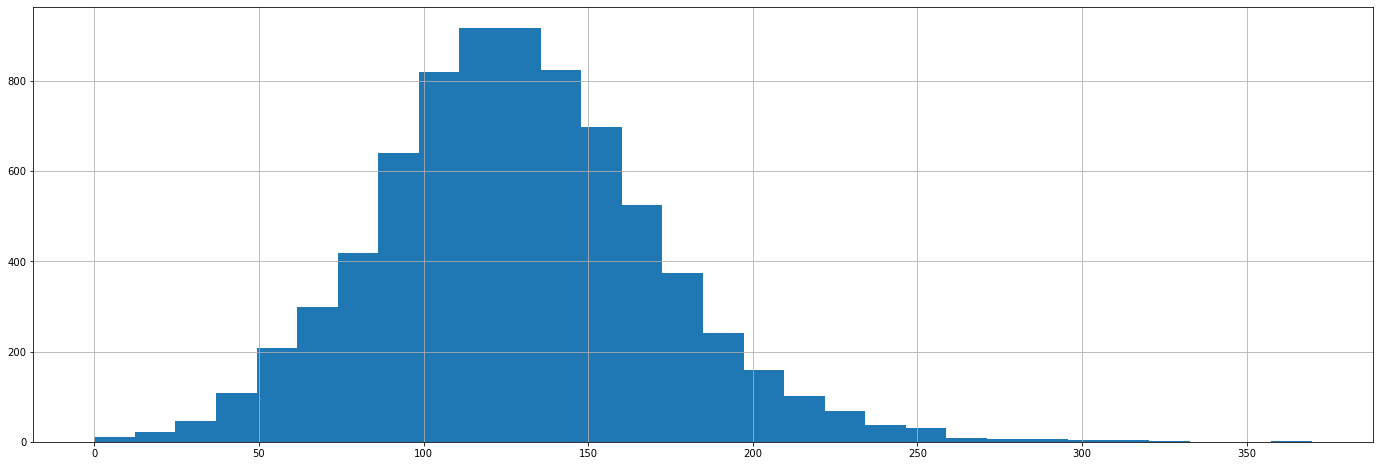

In [183]:
(df['Monthly Debt']).apply(np.sqrt).hist(bins=30)
plt.show()

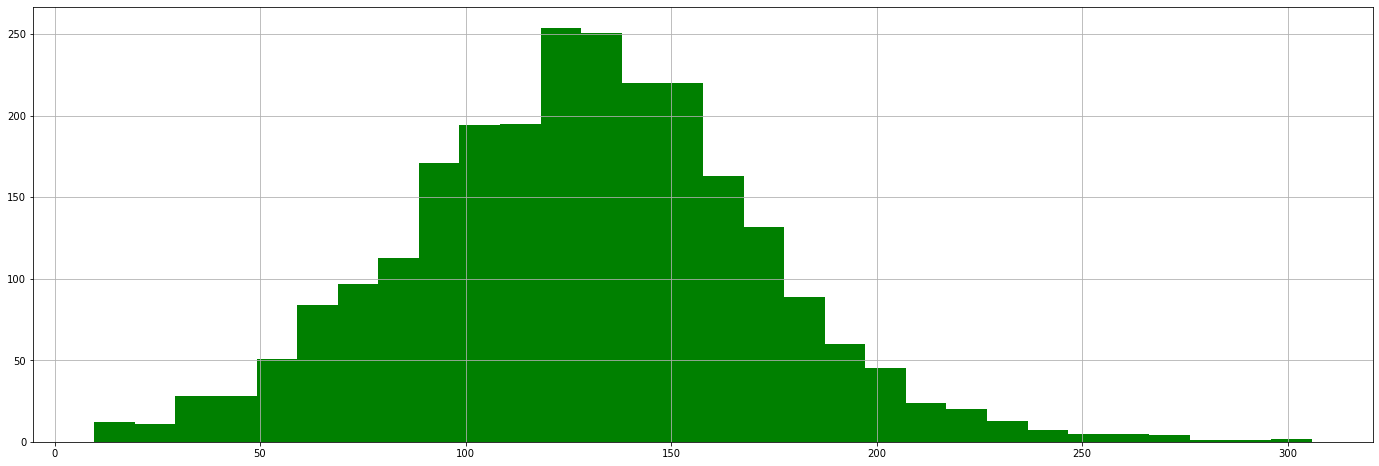

In [184]:
(dftst['Monthly Debt']).apply(np.sqrt).hist(bins=30, color='green')
plt.show()

In [185]:
df['sqr Monthly Debt'] = df['Monthly Debt'].apply(np.sqrt)
dftst['sqr Monthly Debt'] = dftst['Monthly Debt'].apply(np.sqrt)
BASE_FEATURE_NAMES.append('sqr Monthly Debt')
BASE_FEATURE_NAMES.remove('Monthly Debt')

## 'Credit Score'

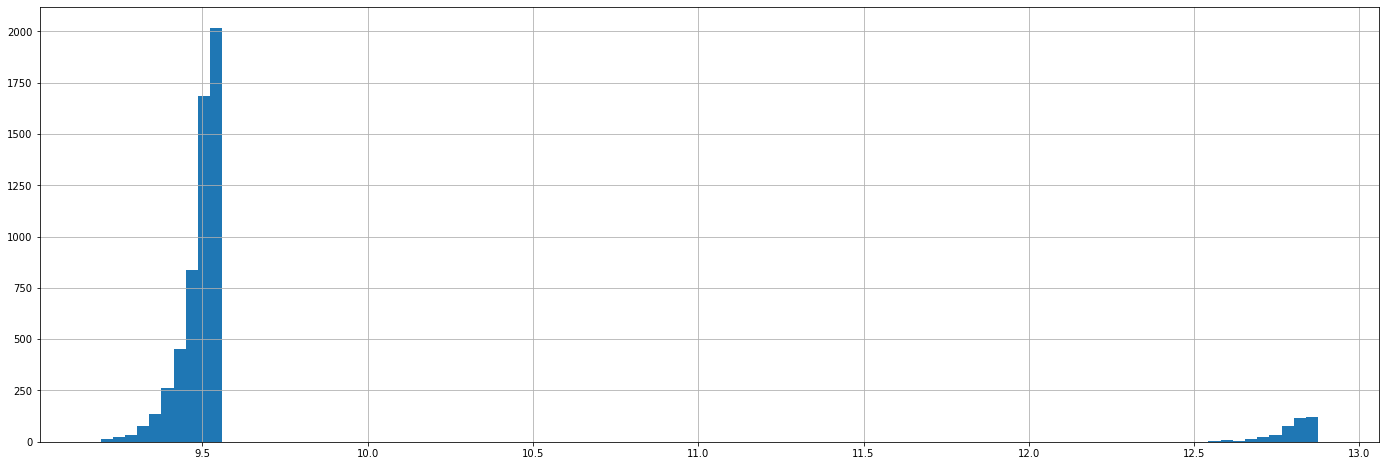

In [186]:
(df['Credit Score']).apply(np.log2).hist(bins=100)
plt.show()

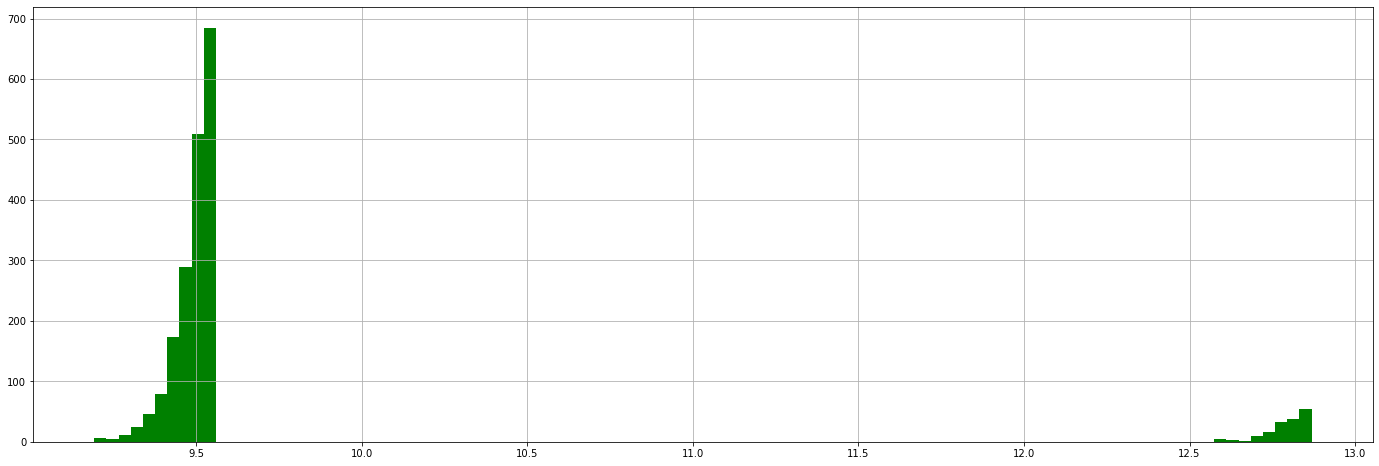

In [187]:
(dftst['Credit Score']).apply(np.log2).hist(bins=100, color='green')
plt.show()

In [188]:
(df['Credit Score']<2000).astype('int').sum(), (df['Credit Score']>=2000).astype('int').sum()

(5543, 400)

In [189]:
(dftst['Credit Score']<2000).astype('int').sum(), (dftst['Credit Score']>=2000).astype('int').sum()

(1827, 160)

In [190]:
df.loc[df['Credit Score']<2000, TARGET_NAME].mean(), df.loc[df['Credit Score']>=2000, TARGET_NAME].mean()

(0.21360274219736605, 1.0)

In [191]:
df['bin high Credit Score'] = np.where(df['Credit Score']>=2000, 1, 0)
dftst['bin high Credit Score'] = np.where(dftst['Credit Score']>=2000, 1, 0)

df['Credit Score'] = np.where(df['Credit Score']>=2000, np.nan, df['Credit Score'])
dftst['Credit Score'] = np.where(dftst['Credit Score']>=2000, np.nan, dftst['Credit Score'])

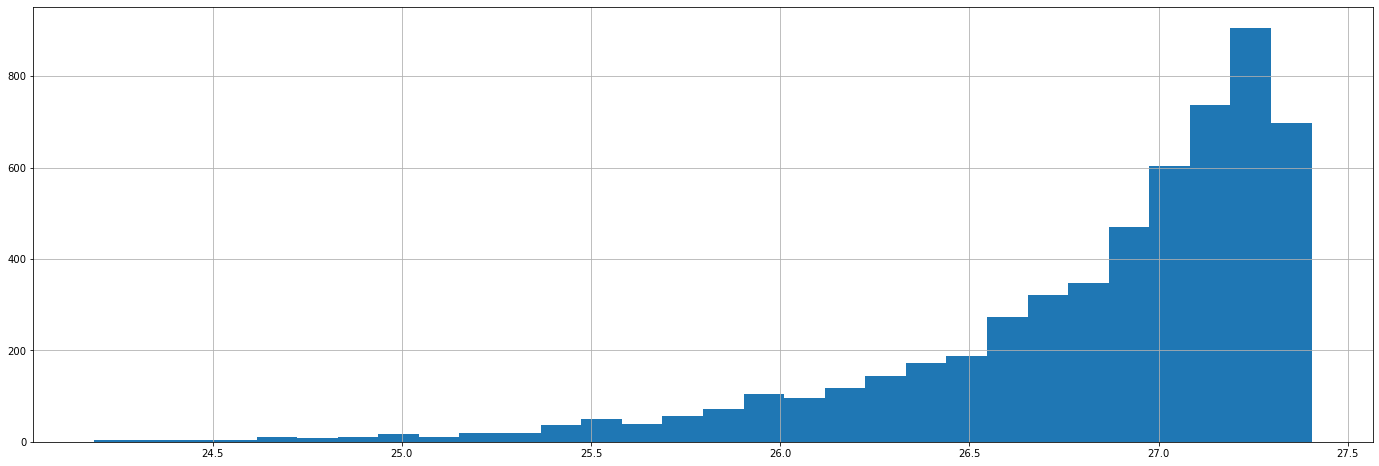

In [192]:
(df['Credit Score']).apply(np.sqrt).hist(bins=30)
plt.show()

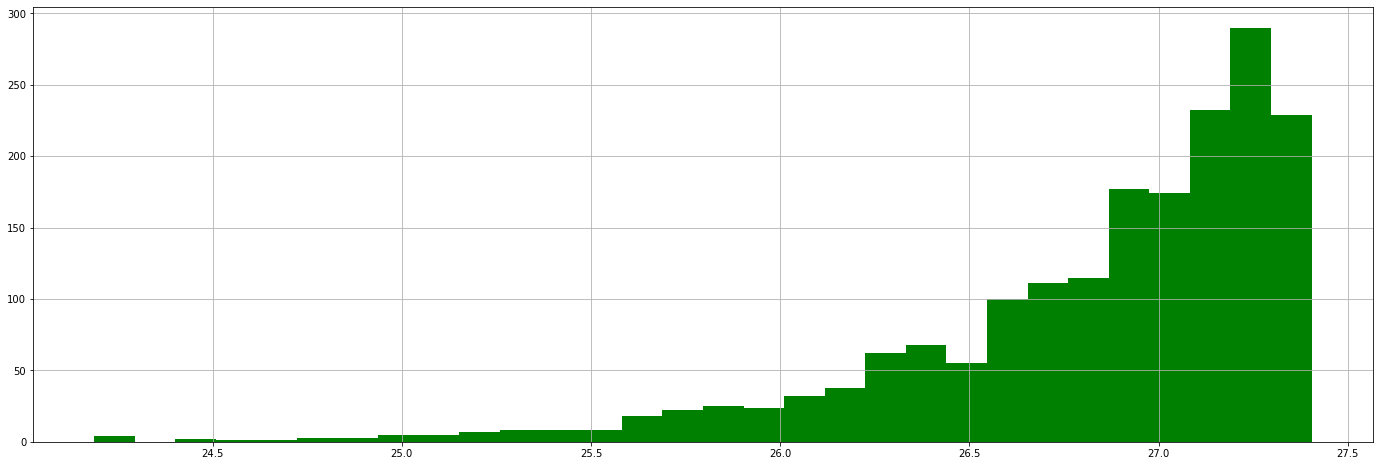

In [193]:
(dftst['Credit Score']).apply(np.sqrt).hist(bins=30, color='green')
plt.show()

In [194]:
BASE_FEATURE_NAMES.append('bin high Credit Score')
df['sqr Credit Score'] = df['Credit Score'].apply(np.sqrt)
dftst['sqr Credit Score'] = dftst['Credit Score'].apply(np.sqrt)
BASE_FEATURE_NAMES.append('sqr Credit Score')
BASE_FEATURE_NAMES.remove('Credit Score')

In [195]:
BASE_FEATURE_NAMES = sorted(list(set(BASE_FEATURE_NAMES)))
BASE_FEATURE_NAMES

['Bankruptcies',
 'Home Ownership',
 'Months since last delinquent',
 'Number of Credit Problems',
 'Purpose',
 'Tax Liens',
 'Term',
 'Years in current job',
 'bin high Credit Score',
 'bin isflyer Current Loan Amount',
 'bin no Current Credit Balance',
 'bin nomore Open Credit',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Credit Score',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History']

## 'Years in current job' - лабелизация

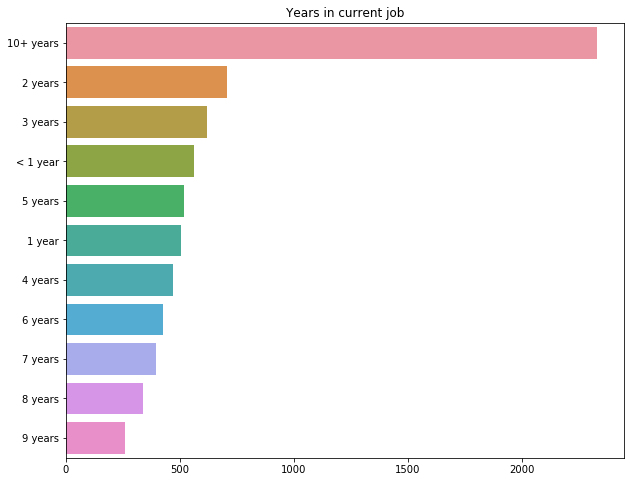

In [196]:
y = df['Years in current job'].value_counts().index
x = list(df['Years in current job'].value_counts())

plt.figure(figsize=(10, 8))

sns.barplot(x=x, y=y)

plt.title('Years in current job')
plt.show()

In [197]:
dftst['Years in current job'].value_counts()

10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
Name: Years in current job, dtype: int64

In [198]:
Years_in_cj_dict = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1,
       '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9}

In [199]:
df['int Years in current job'] = df['Years in current job'].map(Years_in_cj_dict)
dftst['int Years in current job'] = dftst['Years in current job'].map(Years_in_cj_dict)

## И другие лабим

In [200]:
pd.concat([df['Purpose'].value_counts(), dftst['Purpose'].value_counts()], axis=1)

,Purpose,Purpose
business loan,129,30.0
buy a car,96,34.0
buy house,34,19.0
debt consolidation,5944,1973.0
educational expenses,10,3.0
home improvements,412,140.0
major purchase,40,9.0
medical bills,71,27.0
moving,11,1.0
other,665,240.0


In [201]:
Home_Ownership_dict = {'Own Home':0.3, 'Home Mortgage':0.25, 'Rent':0.31, 'Have Mortgage':0.17}

df['flt Home Ownership'] = df['Home Ownership'].map(Home_Ownership_dict)
dftst['flt Home Ownership'] = dftst['Home Ownership'].map(Home_Ownership_dict)

In [202]:
df.groupby(['Home Ownership'])[TARGET_NAME].mean().sort_values()

Home Ownership
Have Mortgage    0.166667
Home Mortgage    0.251856
Own Home         0.296754
Rent             0.313046
Name: Credit Default, dtype: float64

In [203]:
Term_dict = {'Short Term':0, 'Long Term':1}

df['bin Term'] = df['Term'].map(Term_dict)
dftst['bin Term'] = dftst['Term'].map(Term_dict)

In [204]:
df.groupby(['Purpose'])[TARGET_NAME].mean().sort_values()

Purpose
educational expenses    0.100000
moving                  0.181818
major purchase          0.225000
buy a car               0.250000
vacation                0.250000
home improvements       0.262136
buy house               0.264706
wedding                 0.266667
take a trip             0.270270
debt consolidation      0.278264
other                   0.296241
medical bills           0.309859
business loan           0.426357
small business          0.538462
renewable energy        1.000000
Name: Credit Default, dtype: float64

In [205]:
Purpose_dict = {'debt consolidation':0.28, 'other':0.296, 'home improvements':0.262, 'take a trip':0.27,
       'buy a car':0.251, 'small business':0.54, 'business loan':0.43, 'wedding':0.266,
       'educational expenses':0.1, 'buy house':0.265, 'medical bills':0.31, 'moving':0.18,
       'major purchase':0.23, 'vacation':0.25, 'renewable energy':1}

df['flt Purpose'] = df['Purpose'].map(Purpose_dict)
dftst['flt Purpose'] = dftst['Purpose'].map(Purpose_dict)

In [206]:
BASE_FEATURE_NAMES.remove('Home Ownership')
BASE_FEATURE_NAMES.remove('Purpose')
BASE_FEATURE_NAMES.remove('Term')
BASE_FEATURE_NAMES.remove('Years in current job')

In [207]:
BASE_FEATURE_NAMES.append('int Years in current job')
BASE_FEATURE_NAMES.append('flt Home Ownership')
BASE_FEATURE_NAMES.append('bin Term')
BASE_FEATURE_NAMES.append('flt Purpose')

In [208]:
df[BASE_FEATURE_NAMES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
Bankruptcies                       7486 non-null float64
Months since last delinquent       3419 non-null float64
Number of Credit Problems          7500 non-null float64
Tax Liens                          7500 non-null float64
bin high Credit Score              7500 non-null int32
bin isflyer Current Loan Amount    7500 non-null int32
bin no Current Credit Balance      7500 non-null int32
bin nomore Open Credit             7500 non-null int32
log Annual Income                  5943 non-null float64
log Current Credit Balance         7447 non-null float64
log Maximum Open Credit            7435 non-null float64
sqr Credit Score                   5543 non-null float64
sqr Current Loan Amount            6630 non-null float64
sqr Monthly Debt                   7500 non-null float64
sqr Number of Open Accounts        7500 non-null float64
sqr Years of Credit History        7500 non-nu

## Влияние числовых переменных на цель

In [209]:
df[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

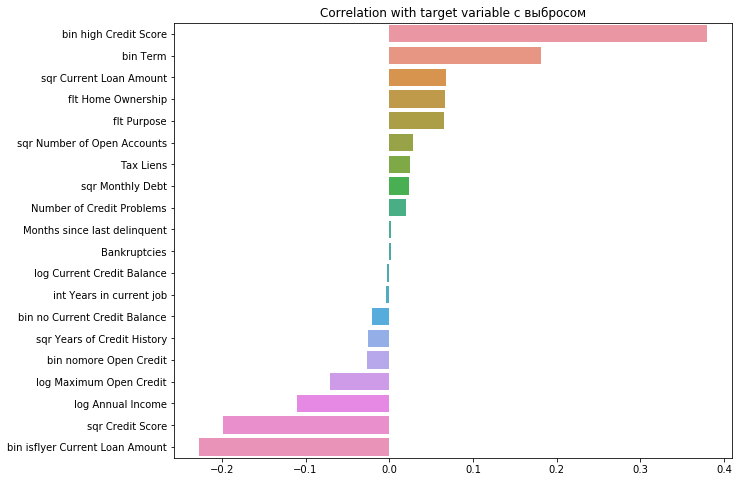

In [210]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable с выбросом')
plt.show()

In [211]:
BASE_FEATURE_NAMES.remove('Months since last delinquent') # удаляем 

In [212]:
BASE_FEATURE_NAMES.remove('Bankruptcies') # удаляем

In [213]:
BASE_FEATURE_NAMES

['Number of Credit Problems',
 'Tax Liens',
 'bin high Credit Score',
 'bin isflyer Current Loan Amount',
 'bin no Current Credit Balance',
 'bin nomore Open Credit',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Credit Score',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History',
 'int Years in current job',
 'flt Home Ownership',
 'bin Term',
 'flt Purpose']

## Корреляции независимых переменных

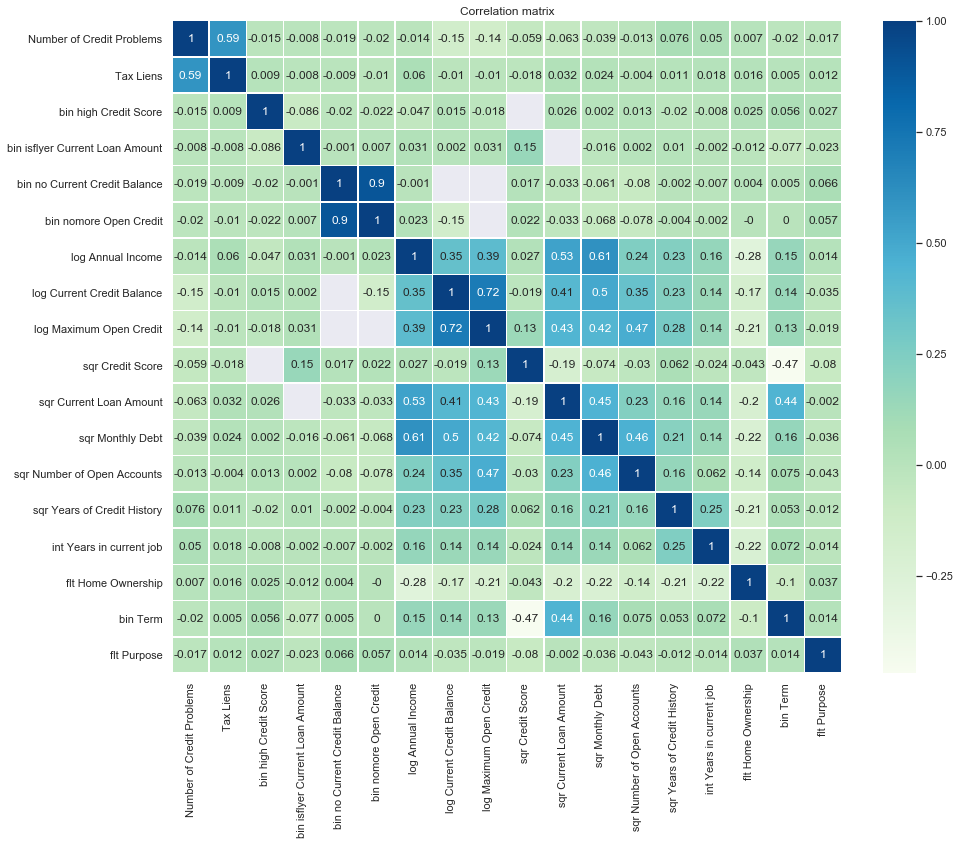

In [214]:
plt.figure(figsize = (15,12))

sns.set(font_scale=1)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [330]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score as auc, SCORERS
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Baseline

In [322]:
feats = BASE_FEATURE_NAMES.copy()


In [323]:
feats_std = [x for x in feats if x[:3]!='bin']
feats_std = [x for x in feats_std if x[:3]!='flt']
feats_std

['Number of Credit Problems',
 'Tax Liens',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Credit Score',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History',
 'int Years in current job']

In [387]:
scaler = StandardScaler()

In [386]:

train[feats_std] = scaler.fit_transform(train[feats_std])
valid[feats_std] = scaler.transform(valid[feats_std])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [343]:
poly = PolynomialFeatures(2)
poly.fit_transform(train[feats_std]).shape

(5250, 78)

In [390]:
df11=df.copy()

In [391]:
df11[feats] = scaler.fit_transform(df11[feats].fillna(0))

In [406]:

nd = np.hstack([poly.fit_transform(df11[feats]),np.array(df[TARGET_NAME]).reshape(-1, 1)])
train, valid = train_test_split(nd, \
                                test_size=0.3, random_state=3, stratify=df[TARGET_NAME])

In [404]:
nd.std()

2.7720807011639415

In [372]:
def eval_model(trn, tst, feats, trsh, model):
    # Оценка метрик модели 
    
    model.fit(trn[:, :-1], trn[:, -1])
    
    pred_trn_p = model.predict_proba(trn[:, :-1]).T[1]
    pred_trn = (model.predict_proba(trn[:, :-1]).T[1] > trsh).astype('int')
    auc_trn = auc(trn[:, -1], pred_trn_p)
    f1_trn =  f1_score(trn[:, -1], pred_trn)
    
    pred_tst_p = model.predict_proba(tst[:, :-1]).T[1]
    pred_tst = (model.predict_proba(tst[:, :-1]).T[1] > trsh).astype('int')
    auc_tst = auc(tst[:, -1], pred_tst_p)
    f1_tst =  f1_score(tst[:, -1], pred_tst)
    
    return auc_trn, auc_tst, f1_trn, f1_tst, model 

In [407]:
lr_model  = LogisticRegression(random_state=0, solver='liblinear')
auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.285, lr_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.80045502230556, 0.7766186713308554, 0.5831669044222539, 0.5533028122956181)

In [243]:
feats

['Number of Credit Problems',
 'Tax Liens',
 'bin high Credit Score',
 'bin isflyer Current Loan Amount',
 'bin no Current Credit Balance',
 'bin nomore Open Credit',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Credit Score',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History',
 'int Years in current job',
 'flt Home Ownership',
 'bin Term',
 'flt Purpose']

## Байес

In [230]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()



In [379]:
auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.53, nb_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.7097223768666933,
 0.7485427663428803,
 0.4532789670404349,
 0.5131677953348383)

## CatBoost

In [245]:
feats = BASE_FEATURE_NAMES.copy()

In [62]:

feats.remove('Years in current job')

In [246]:
import catboost as catb
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

In [247]:
train, valid = train_test_split(df, test_size=0.3, random_state=70, stratify=df[TARGET_NAME])

In [255]:

catb_model = catb.CatBoostClassifier(#n_estimators=80, max_depth=4, 
                                      #l2_leaf_reg=99, bagging_temperature=0,
                                     #learning_rate =0.15,
                                     # boosting_type='Ordered', 
                                      #max_depth=5,
                                      class_weights=[1, 3.3],
                                      silent=True, random_state=70
                                    )

In [304]:
cv = KFold(n_splits=5, random_state=21, shuffle=True)

In [408]:
X, y = nd[:,:-1], nd[:,-1]

In [102]:
params = {'max_depth':[3, 4, 5],
          'n_estimators': [ 75, 80, 85],
          #'l2_leaf_reg':[25,75,200],
          'learning_rate': [0.12, 0.15, 0.17]}

In [307]:

rs = RandomizedSearchCV(lr_model, {}, scoring='roc_auc', cv=cv, n_jobs=1, random_state=70)


In [409]:
%%time
rs.fit(X, y)

Wall time: 17 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=1, param_distributions={},
                   pre_dispatch='2*n_jobs', random_state=70, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [410]:
rs.best_params_, rs.best_score_

({}, 0.772730964338369)

In [220]:
train, valid = train_test_split(df, test_size=0.3, random_state=70, stratify=df[TARGET_NAME])

In [218]:
#sorted(SCORERS.keys())

In [256]:
auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.56, catb_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.9769966125240684, 0.7489361120654652, 0.86210102262163, 0.5090634441087613)

In [242]:
feats

['Number of Credit Problems',
 'Tax Liens',
 'bin high Credit Score',
 'bin isflyer Current Loan Amount',
 'bin no Current Credit Balance',
 'bin nomore Open Credit',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Credit Score',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History',
 'int Years in current job',
 'flt Home Ownership',
 'bin Term',
 'flt Purpose']

## XGBoost

In [258]:
import xgboost as xgb

In [463]:
train, valid = train_test_split(df, test_size=0.3, random_state=70, stratify=df[TARGET_NAME])

In [637]:
feats = feats = BASE_FEATURE_NAMES.copy()
feats.remove('Home Ownership')
feats.remove('Purpose')
feats.remove('Term')
feats.remove('Years in current job')

In [259]:
xgb_model = xgb.XGBClassifier(max_depth=3, min_child_weight=7, colsample_bytree=0.27)

In [260]:
auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.24, xgb_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.8264605744454897, 0.7590889215104476, 0.584622489032556, 0.5270988310308183)

## LightGBM

In [152]:
import lightgbm as lgbm

In [ ]:
train, valid = train_test_split(df, test_size=0.3, random_state=70, stratify=df[TARGET_NAME])

In [153]:
lgbm_model = lgbm.LGBMClassifier()

In [162]:
auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.3, lgbm_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.9847010448945899,
 0.7478136614923322,
 0.8744615384615385,
 0.5303140978816654)

## Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier as RF

In [660]:
train, valid = train_test_split(df, test_size=0.3, random_state=70, stratify=df[TARGET_NAME])


In [164]:
n_est=20
mx_d=13
rnd_st=70
rf_model = RF(n_estimators=n_est, max_depth=mx_d, random_state=rnd_st)


In [170]:

auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, feats, 0.5, rf_model)
auc_trn, auc_tst, f1_trn, f1_tst

(0.9837079136192741,
 0.7392996298841241,
 0.7736389684813754,
 0.4343991179713341)

In [173]:
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [185]:
feats = BASE_FEATURE_NAMES.copy()

sfeat = []

aucv=0
feat_count=0
while feats and feat_count<20:
    best_feat = ''
    for i, feat in enumerate(feats):
        featstst = sfeat + [feat]

        auc_trn, auc_tst, f1_trn, f1_tst, rf = eval_model(train, valid, featstst, 0.27, model)

        if auc_tst > aucv:
            aucv = auc_tst
            best_feat = feat
            ind = i
            print('best_feat:', best_feat, ' f1:', aucv)

    if best_feat:
        sfeat += [best_feat]
    else:
        break
    feats = feats[:ind] + feats[ind+1 :]
    print(aucv, sfeat)
    feat_count += 1
    print('---------------',feat_count,'---------------')

greedy_complete = True    
sfeat, aucv

best_feat: Number of Credit Problems  f1: 0.5126417215854078
best_feat: bin high Credit Score  f1: 0.5962145110410094
best_feat: sqr Credit Score  f1: 0.6931776478120999
0.6931776478120999 ['sqr Credit Score']
--------------- 1 ---------------
best_feat: Tax Liens  f1: 0.6938330613424118
best_feat: bin high Credit Score  f1: 0.7108606365368397
best_feat: bin isflyer Current Loan Amount  f1: 0.7187826974732174
0.7187826974732174 ['sqr Credit Score', 'bin isflyer Current Loan Amount']
--------------- 2 ---------------
best_feat: Tax Liens  f1: 0.71914188165662
best_feat: bin high Credit Score  f1: 0.7364656861979573
0.7364656861979573 ['sqr Credit Score', 'bin isflyer Current Loan Amount', 'bin high Credit Score']
--------------- 3 ---------------
best_feat: bin no Current Credit Balance  f1: 0.7372631141268701
best_feat: bin nomore Open Credit  f1: 0.7378653332604554
best_feat: int Term  f1: 0.7496813216416278
0.7496813216416278 ['sqr Credit Score', 'bin isflyer Current Loan Amount', 'b

(['sqr Credit Score',
  'bin isflyer Current Loan Amount',
  'bin high Credit Score',
  'int Term',
  'bin nomore Open Credit',
  'Tax Liens'],
 0.7506188118811882)

In [186]:
feats

['Number of Credit Problems',
 'bin no Current Credit Balance',
 'log Annual Income',
 'log Current Credit Balance',
 'log Maximum Open Credit',
 'sqr Current Loan Amount',
 'sqr Monthly Debt',
 'sqr Number of Open Accounts',
 'sqr Years of Credit History',
 'int Years in current job',
 'int Home Ownership',
 'int Purpose']

In [48]:
pd.qcut(df['Current Loan Amount'], 5, duplicates='drop').unique()

[NaN, (223027.2, 325780.4], (11241.999, 147892.8], (325780.4, 449728.4], (449728.4, 789030.0], (147892.8, 223027.2]]
Categories (5, interval[float64]): [(11241.999, 147892.8] < (147892.8, 223027.2] < (223027.2, 325780.4] < (325780.4, 449728.4] < (449728.4, 789030.0]]

In [49]:
pd.cut(df['Current Loan Amount'], 5, duplicates='drop').unique()

[NaN, (166799.6, 322357.2], (10464.212, 166799.6], (322357.2, 477914.8], (477914.8, 633472.4], (633472.4, 789030.0]]
Categories (5, interval[float64]): [(10464.212, 166799.6] < (166799.6, 322357.2] < (322357.2, 477914.8] < (477914.8, 633472.4] < (633472.4, 789030.0]]

In [50]:
df[df['Current Loan Amount'] != 99999999].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,no more Open Credit,is_fliyer Current Loan Amount,high Credit Score,int Years in current job
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.435000e+03,7500.000000,3419.000000,7486.000000,6630.000000,7.500000e+03,7500.000000,5543.000000,7500.000000,7500.000000,7500.000000,7500.000000,7129.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,6.396396e+05,0.170000,34.692600,0.117152,309024.390347,2.898332e+05,18314.454133,720.705935,0.281733,0.008667,0.116000,0.053333,5.880348
std,8.453392e+05,0.271604,4.908924,7.041946,6.141059e+05,0.498598,21.688806,0.347192,182294.008621,3.178714e+05,11926.764673,27.651126,0.449874,0.092697,0.320246,0.224712,3.620092
min,1.645970e+05,0.000000,2.000000,4.000000,4.334000e+03,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.844050e+05,0.000000,16.000000,0.000000,172744.000000,1.142565e+05,10067.500000,709.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.794680e+05,0.000000,32.000000,0.000000,265826.000000,2.093230e+05,16076.500000,729.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.920660e+05,0.000000,50.000000,0.000000,430100.000000,3.604062e+05,23818.000000,741.000000,1.000000,0.000000,0.000000,0.000000,10.000000
max,1.014934e+07,7.000000,43.000000,57.700000,7.526552e+06,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [51]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,no more Open Credit,is_fliyer Current Loan Amount,high Credit Score,int Years in current job
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.435000e+03,7500.000000,3419.000000,7486.000000,6630.000000,7.500000e+03,7500.000000,5543.000000,7500.000000,7500.000000,7500.000000,7500.000000,7129.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,6.396396e+05,0.170000,34.692600,0.117152,309024.390347,2.898332e+05,18314.454133,720.705935,0.281733,0.008667,0.116000,0.053333,5.880348
std,8.453392e+05,0.271604,4.908924,7.041946,6.141059e+05,0.498598,21.688806,0.347192,182294.008621,3.178714e+05,11926.764673,27.651126,0.449874,0.092697,0.320246,0.224712,3.620092
min,1.645970e+05,0.000000,2.000000,4.000000,4.334000e+03,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.844050e+05,0.000000,16.000000,0.000000,172744.000000,1.142565e+05,10067.500000,709.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.794680e+05,0.000000,32.000000,0.000000,265826.000000,2.093230e+05,16076.500000,729.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.920660e+05,0.000000,50.000000,0.000000,430100.000000,3.604062e+05,23818.000000,741.000000,1.000000,0.000000,0.000000,0.000000,10.000000
max,1.014934e+07,7.000000,43.000000,57.700000,7.526552e+06,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000,1.000000,1.000000,1.000000,10.000000
